<a href="https://colab.research.google.com/github/TeddyR30/sales-analysis/blob/main/Minicourse_DA_Intro_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Introduction to Variable

In [2]:
a = 5

In [3]:
b = 6

In [4]:
print(a+b)

11


In [5]:
c = "This Is String"

In [6]:
print(c)

This Is String


#Introduction to Looping

In [7]:
print(a+0)
print(a+1)
print(a+2)

5
6
7


In [8]:
for i in range(5):
  print(a+i)

5
6
7
8
9


#Read Data and Cleaning Data

#How to Read Data in Google Sheet

In [10]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1BKANkXSistEgLzWmcDLpxTTGi5KWMnFa6JvmTVsrGGk/edit#gid=1903509374'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1BKANkXSistEgLzWmcDLpxTTGi5KWMnFa6JvmTVsrGGk/export?format=csv&gid=1903509374


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [13]:
df.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [14]:
#change type data
df_cleaned = df.copy()

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Revenue'] = df_cleaned['Unit price'] * df_cleaned['Quantity']

print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB
None


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [18]:
#check typo

df_cleaned['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [21]:
#check typo with Looping

for col_name in ['Payment', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line']:
  print(df_cleaned[col_name].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



In [25]:
#replace
dict_typo = {'male' : 'Male',
             'female' : 'Female',
             'fml' : 'Female'}

df_replaced = df_cleaned.replace(dict_typo)
df_replaced.head(10)

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17
5,2019-03-25,Ewallet,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,597.73
6,2019-02-25,Ewallet,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,413.04
7,2019-02-24,Ewallet,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,735.60
8,2019-01-10,Credit card,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,72.52
9,2019-02-20,Credit card,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,164.52


In [26]:
df_replaced['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [27]:
df_replaced['Invoice ID'].duplicated().sum()

0

# EDA

##Daily Trend Overall

In [31]:
agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()
agg_daily.head()

<ipython-input-31-316445d7fbb2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()


,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55


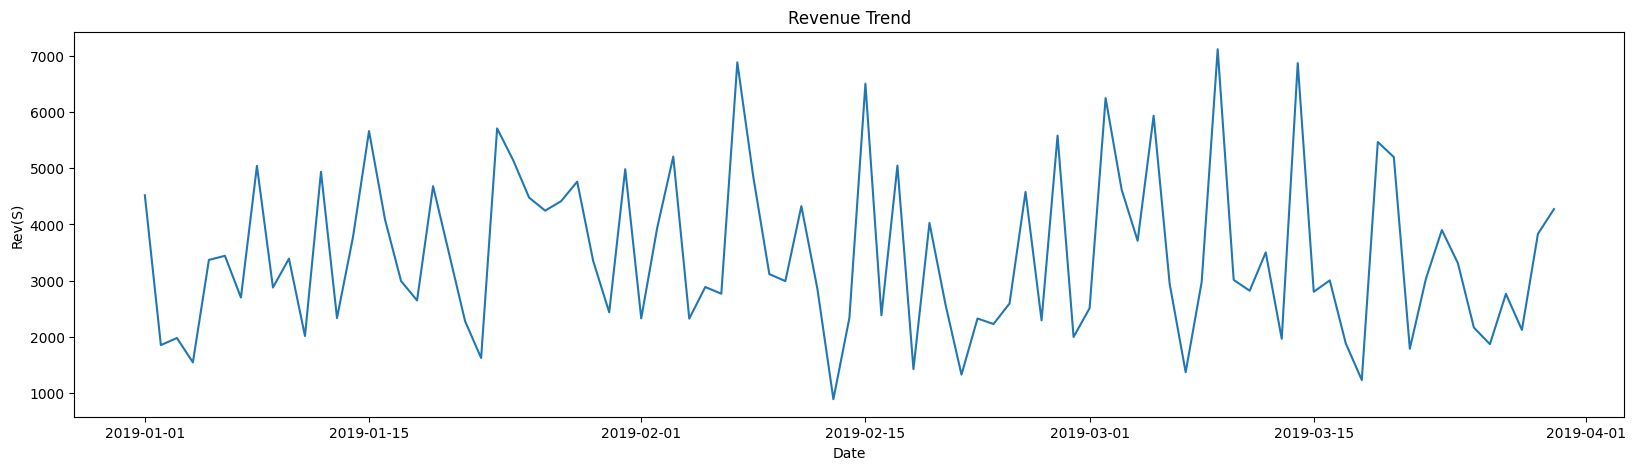

In [32]:
plt.rcParams["figure.figsize"] = (20, 5)

plt.plot('Date', 'Revenue', data=agg_daily)
plt.title('Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Rev(S)')
plt.show()

Revenue of Our Data Has Seasonality

<Axes: xlabel='Date', ylabel='Quantity'>

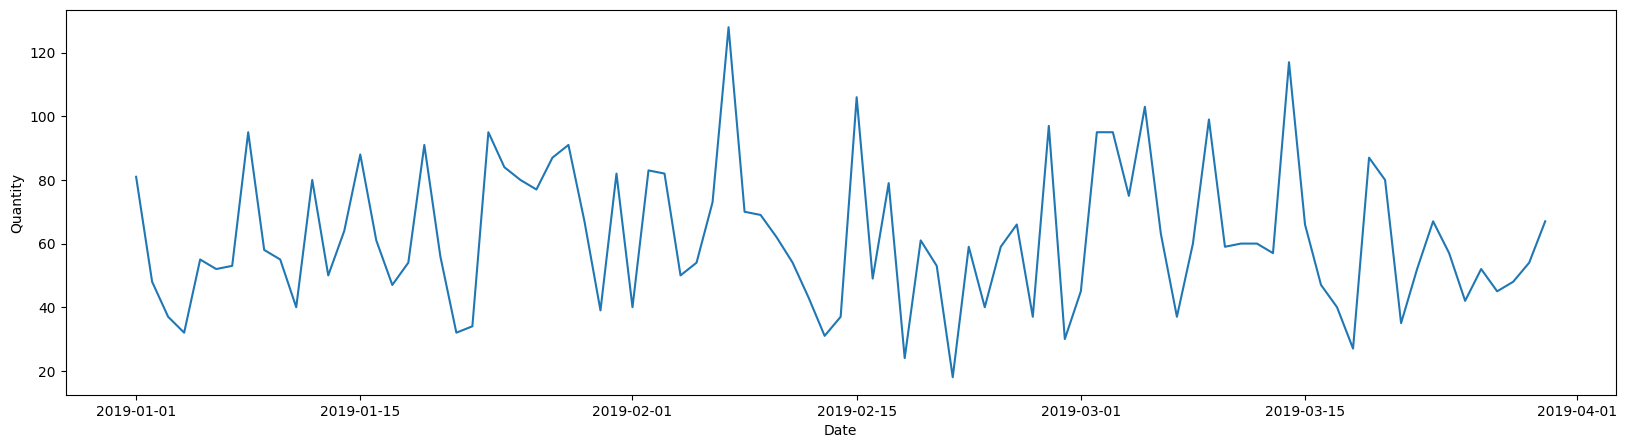

In [33]:
sns.lineplot(data = agg_daily, x='Date', y='Quantity')

##By Payment

In [41]:
agg_payment = df_replaced.groupby('Payment', as_index=False).agg({'Revenue':'sum', 'Invoice ID':'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


<Axes: xlabel='Payment', ylabel='Revenue'>

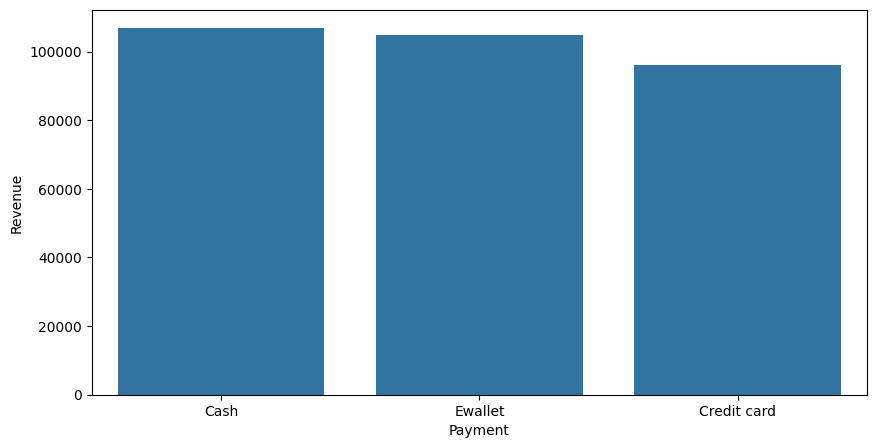

In [48]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.barplot( x='Payment', y='Revenue', data = agg_payment.sort_values('Revenue', ascending=False))


Highest Revenue Come From Cash

<Axes: xlabel='Payment', ylabel='Invoice ID'>

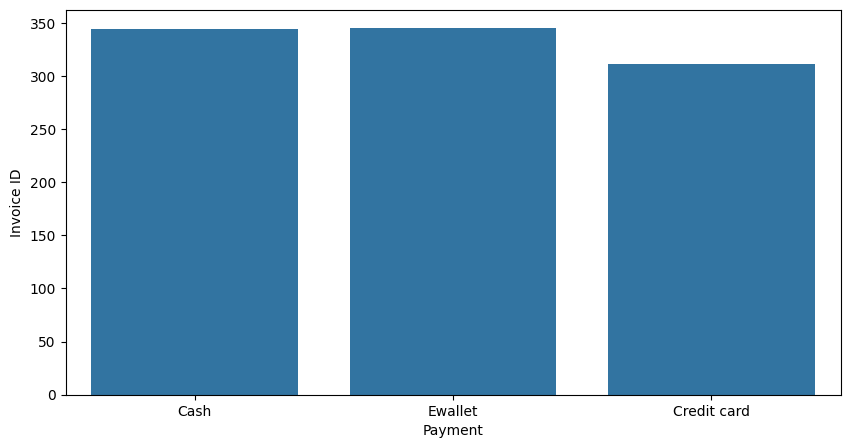

In [51]:
sns.barplot( x='Payment', y='Invoice ID', data = agg_payment.sort_values('Revenue', ascending=False))

From Count Transaction, E-Wallet is Highest

([<matplotlib.patches.Wedge at 0x7af8e2c2b100>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '35%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31%'),
  Text(0.288108634542965, -0.5263016385133037, '34%')])

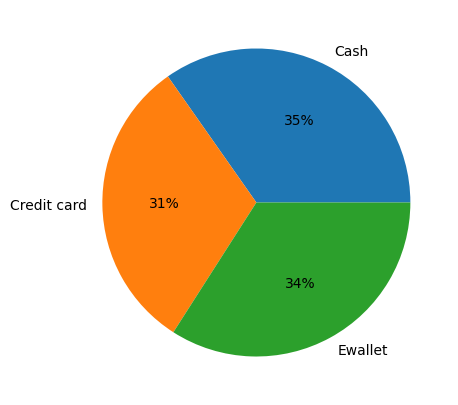

In [52]:
plt.pie(agg_payment['Revenue'], labels = agg_payment['Payment'], autopct='%.lf%%')

From Revenue:
Cash Volume 34.7% and it up 3.5% from Credit Card

# By Gender and By Product Type

In [55]:
agg_gender = df_replaced.groupby(['Gender', 'Product line'], as_index=False)['Invoice ID'].nunique()
agg_gender.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


<Axes: xlabel='Product line', ylabel='Invoice ID'>

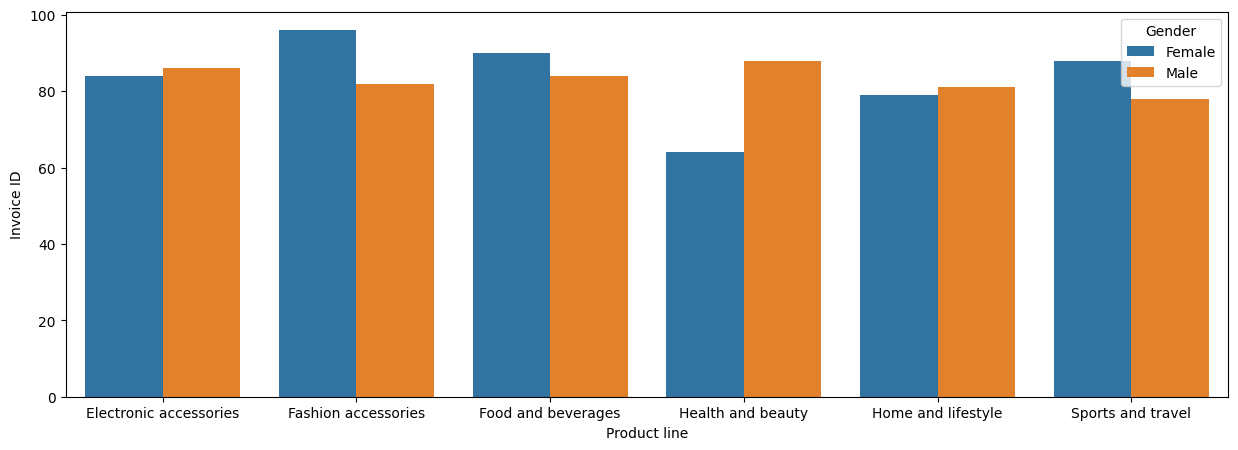

In [58]:
plt.rcParams["figure.figsize"] = (15, 5)
sns.barplot(x='Product line', y='Invoice ID', data = agg_gender, hue = 'Gender')